In [1]:
#Step 1: Install dependencies (Google Colab usually has these pre-installed)
!pip install scikit-learn pandas numpy joblib

In [2]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [3]:
# ✅ Step 3: Load Dataset
# Telco Churn dataset (from Kaggle or IBM)
# Make sure to upload 'WA_Fn-UseC_-Telco-Customer-Churn.csv' to Colab
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
print(df.shape)   # should be (7043, 21)
print(df.columns) # check column names

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:

# ✅ Step 4: Basic Preprocessing
# Drop customerID (not useful for prediction)
df.drop("customerID", axis=1, inplace=True)

In [7]:
# Convert TotalCharges to numeric (some values may be blank)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

/tmp/ipython-input-621734332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [8]:
# Target variable
y = df["Churn"].map({"Yes": 1, "No": 0})
X = df.drop("Churn", axis=1)

In [9]:
# ✅ Step 5: Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [10]:
# ✅ Step 6: Preprocessing Pipelines
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [11]:
# ✅ Step 7: Define Models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)

In [12]:
# ✅ Step 8: Build Pipeline with placeholder model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", log_reg)  # default, will swap in GridSearch
])

In [13]:
# ✅ Step 9: Define Hyperparameter Grid
param_grid = [
    {
        "classifier": [log_reg],
        "classifier__C": [0.1, 1.0, 10.0],
        "classifier__solver": ["lbfgs", "liblinear"]
    },
    {
        "classifier": [rf],
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [None, 10, 20],
        "classifier__min_samples_split": [2, 5]
    }
]

In [14]:
# ✅ Step 10: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
# ✅ Step 11: Hyperparameter Tuning with GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

In [16]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,  # fewer folds = faster
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)


In [17]:
param_grid = [
    {
        "classifier": [log_reg],
        "classifier__C": [0.1, 1.0]  # reduced
    },
    {
        "classifier": [rf],
        "classifier__n_estimators": [100],  # fewer trees
        "classifier__max_depth": [10],      # limited depth
    }
]


In [18]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=5,  # test only 5 random combos
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['SeniorCitizen',
                                                                                'tenure',
                                                                                'MonthlyCharges',
                                                                                'TotalCharges']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['gender',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'PhoneService',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceP...
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'classifier': [LogisticRegression(max_iter=1000,
                                                                           random_state=42)],
                                         'classifier__C': [0.1, 1.0]},
                                        {'classifier': [RandomForestClassifier(random_state=42)],
                                         'classifier__max_depth': [10],
                                         'classifier__n_estimators': [100]}],
                   random_state=42, scoring='accuracy', verbose=2)

In [19]:
# ✅ Step 12: Evaluate Model
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [20]:
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtect...
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            random_state=42)],
                          'classifier__C': [0.1, 1.0, 10.0],
                          'classifier__solver': ['lbfgs', 'liblinear']},
                         {'classifier': [RandomForestClassifier(random_state=42)],
                          'classifier__max_depth': [None, 10, 20],
                          'classifier__min_samples_split': [2, 5],
                          'classifier__n_estimators': [100, 200]}],
             scoring='accuracy', verbose=2)

In [21]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'classifier': LogisticRegression(max_iter=1000, random_state=42), 'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Best cross-validation accuracy: 0.8047568335108272


In [22]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,  # same param_grid as before
    n_iter=5,   # try only 5 random combos
    cv=3,       # use 3-fold CV
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

y_pred = random_search.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters: {'classifier__C': 0.1, 'classifier': LogisticRegression(max_iter=1000, random_state=42)}
Best cross-validation accuracy: 0.8047568335108272

Test Accuracy: 0.7998580553584103

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [23]:
# ✅ Step 13: Export Best Pipeline
joblib.dump(grid_search.best_estimator_, "churn_pipeline.joblib")
print("✅ Pipeline saved as churn_pipeline.joblib")

✅ Pipeline saved as churn_pipeline.joblib


In [24]:
# ✅ Step 14: Load and Test Pipeline (simulation of production use)
loaded_pipeline = joblib.load("churn_pipeline.joblib")
sample_preds = loaded_pipeline.predict(X_test[:5])
print("Sample predictions:", sample_preds)

Sample predictions: [0 1 0 0 0]


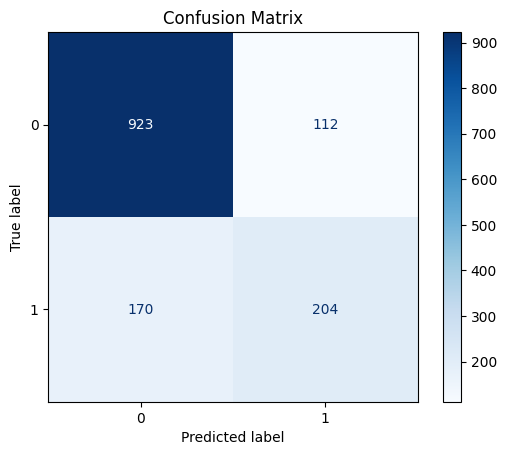

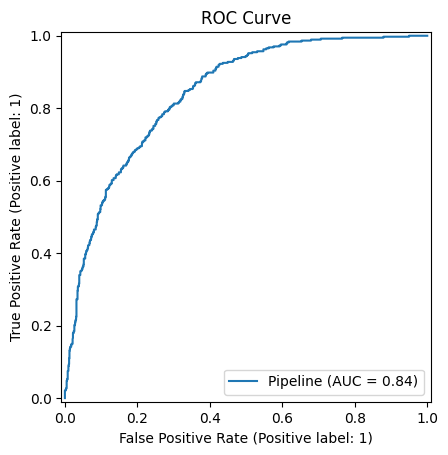

Feature importances are not available for Logistic Regression.


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# ✅ Confusion Matrix
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ✅ ROC Curve
RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# ✅ Feature Importances (only if model is Random Forest)
best_model = grid_search.best_estimator_.named_steps["classifier"]

if hasattr(best_model, "feature_importances_"):
    # Get feature names after preprocessing
    ohe = grid_search.best_estimator_.named_steps["preprocessor"].named_transformers_["cat"]
    cat_features = ohe.get_feature_names_out(categorical_features)
    all_features = np.concatenate([numerical_features, cat_features])

    # Plot top 15 features
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[-15:]

    plt.figure(figsize=(8,6))
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), all_features[indices])
    plt.title("Top 15 Feature Importances (Random Forest)")
    plt.show()
else:
    print("Feature importances are not available for Logistic Regression.")
